In [1]:
from sklearn import cluster
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import csv
import pandas as pd
import numpy as np
import pickle
from sklearn.externals import joblib
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from sklearn import manifold, datasets

In [2]:
loan_df = pd.read_csv('../Loan.csv', low_memory=False) 

In [3]:
feature_df = loan_df[['application_type','emp_length', 'dti', 'annual_inc',
       'int_rate', 'loan_amnt', 'purpose', 'State', 'home_ownership', 'term', 'fico', 'approval']]

In [4]:
home_ownerships = pd.get_dummies(feature_df['home_ownership'], prefix='house')
feature_df = feature_df.join(home_ownerships)
feature_df.drop('home_ownership', axis=1, inplace=True)

app_type = pd.get_dummies(feature_df['application_type'], prefix='appType')
feature_df = feature_df.join(app_type)
feature_df.drop('application_type', axis=1, inplace=True)

adr_states = pd.get_dummies(feature_df['State'], prefix='s')
feature_df = feature_df.join(adr_states)
feature_df.drop('State', axis=1, inplace=True)

#debt_settlement_flag  
#debt_settle_flg = pd.get_dummies(feature_df['debt_settlement_flag'], prefix='stlFlg')
#feature_df = feature_df.join(debt_settle_flg)
#feature_df.drop('debt_settlement_flag', axis=1, inplace=True)     
#
#purpose   
purpose = pd.get_dummies(feature_df['purpose'], prefix='purpose')
feature_df = feature_df.join(purpose)
feature_df.drop('purpose', axis=1, inplace=True)

In [5]:
k_cluster = joblib.load(open('../kmeanCluster.pkl', 'rb'))
#Create new column in load_df for the k-means clustering 
k_mean_feature_df = feature_df
k_mean_feature_df['kMean'] = k_cluster.labels_

In [6]:
kmean_0 = k_mean_feature_df[k_mean_feature_df['kMean']==0]
kmean_0.drop('kMean', axis=1, inplace=True)
kmean_1 = k_mean_feature_df[k_mean_feature_df['kMean']==1]
kmean_1.drop('kMean', axis=1, inplace=True)
kmean_2 = k_mean_feature_df[k_mean_feature_df['kMean']==2]
kmean_2.drop('kMean', axis=1, inplace=True)
kmean_3 = k_mean_feature_df[k_mean_feature_df['kMean']==3]
kmean_3.drop('kMean', axis=1, inplace=True)
kmean_4 = k_mean_feature_df[k_mean_feature_df['kMean']==4]
kmean_4.drop('kMean', axis=1, inplace=True)
kmean_5 = k_mean_feature_df[k_mean_feature_df['kMean']==5]
kmean_5.drop('kMean', axis=1, inplace=True)
kmean_6 = k_mean_feature_df[k_mean_feature_df['kMean']==6]
kmean_6.drop('kMean', axis=1, inplace=True)
kmean_7 = k_mean_feature_df[k_mean_feature_df['kMean']==7]
kmean_7.drop('kMean', axis=1, inplace=True)

C:\Users\madhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\madhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\madhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\madhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is tryi

In [8]:
sel_loan_data = feature_df.sample(n=6000)

In [9]:
snegraph = TSNE(perplexity=100,n_iter=500)

In [11]:
Y = snegraph.fit_transform(sel_loan_data)

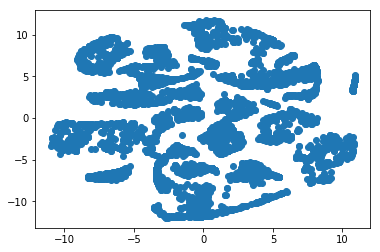

In [13]:
plt.scatter(Y[:,0],Y[:,1], cmap=plt.cm.Spectral)
plt.show()

In [18]:
sel_loan_data_0 = kmean_0.sample(n=4000)
sel_loan_data_1 = kmean_1.sample(n=4000)
sel_loan_data_2 = kmean_2.sample(n=4000)
sel_loan_data_3 = kmean_3.sample(n=4000)
sel_loan_data_4 = kmean_4.sample(n=4000)
sel_loan_data_5 = kmean_5.sample(n=4000)
sel_loan_data_6 = kmean_6.sample(n=4000)
sel_loan_data_7 = kmean_7.sample(n=4000)

In [19]:
snegraph2 = TSNE(perplexity=200,n_iter=200)

In [20]:
T0 = snegraph2.fit_transform(sel_loan_data_0)
T1 = snegraph2.fit_transform(sel_loan_data_1)
T2 = snegraph2.fit_transform(sel_loan_data_2)
T3 = snegraph2.fit_transform(sel_loan_data_3)
T4 = snegraph2.fit_transform(sel_loan_data_4)
T5 = snegraph2.fit_transform(sel_loan_data_5)
T6 = snegraph2.fit_transform(sel_loan_data_6)
T7 = snegraph2.fit_transform(sel_loan_data_7)

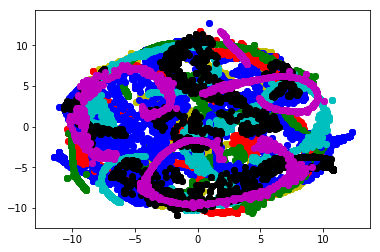

In [22]:
plt.scatter(T0[:,0],T0[:,1], c='y')
plt.scatter(T1[:,0],T1[:,1], c='b')
plt.scatter(T2[:,0],T2[:,1], c='r')
plt.scatter(T3[:,0],T3[:,1], c='g')
plt.scatter(T4[:,0],T4[:,1], c='b')
plt.scatter(T5[:,0],T5[:,1], c='c')
plt.scatter(T6[:,0],T6[:,1], c='k')
plt.scatter(T7[:,0],T7[:,1], c='m')
plt.show()

The text in the document by SHREYANTH REDDY BEZAWADA is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/

Copyright 2018 SHREYANTH REDDY BEZAWADA AND ADITYA MOHAN KUMAR

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.